In [39]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import decode_image

train_image_path = val_image_path = "./dataset/fairface-img-margin025-trainval/"
train_label_path = "./dataset/fairface_label_train.csv"
val_label_path = "./dataset/fairface_label_val.csv"


In [35]:
class FairFaceDataset(Dataset):
    def __init__(self, image_path, label_path, transform=None):
        self.image_path = image_path
        self.file_path = pd.read_csv(label_path)["file"]
        self.labels = pd.read_csv(label_path)[["race"]]
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_file = os.path.join(self.image_path, self.file_path.iloc[idx])
        image = decode_image(img_file, mode = "RGB")
        # print(image.shape)
        # print(image)
        label = self.labels.iloc[idx]
        if self.transform:
            image = self.transform(image)

        return image, label

In [36]:
train_dataset = FairFaceDataset(train_image_path, train_label_path)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = FairFaceDataset(val_image_path, val_label_path)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

86744 10954
(tensor([[[ 8,  9, 10,  ..., 45, 45, 45],
         [ 7,  8,  9,  ..., 42, 41, 41],
         [ 6,  6,  8,  ..., 35, 34, 34],
         ...,
         [42, 42, 43,  ..., 20, 21, 20],
         [39, 39, 37,  ..., 21, 22, 22],
         [37, 37, 35,  ..., 24, 23, 23]],

        [[ 8,  9,  8,  ..., 26, 24, 24],
         [ 7,  8,  7,  ..., 25, 23, 23],
         [ 6,  6,  6,  ..., 24, 23, 23],
         ...,
         [25, 25, 27,  ..., 17, 18, 20],
         [27, 27, 27,  ..., 18, 19, 20],
         [26, 26, 26,  ..., 20, 21, 21]],

        [[10, 11, 11,  ..., 20, 21, 21],
         [ 9, 10, 10,  ..., 18, 19, 19],
         [ 8,  8,  7,  ..., 18, 19, 19],
         ...,
         [31, 31, 30,  ..., 10, 11, 10],
         [31, 31, 28,  ...,  9, 10,  8],
         [30, 30, 27,  ..., 11,  9,  9]]], dtype=torch.uint8), race    East Asian
Name: 0, dtype: object)


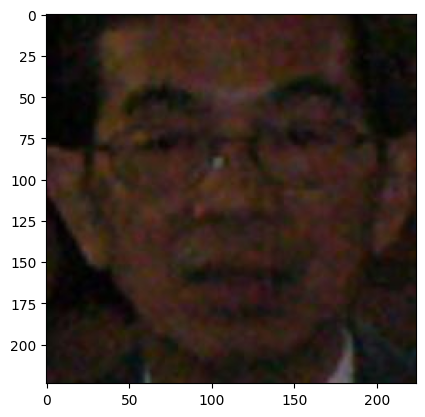

In [40]:
def view(img):
    plt.imshow(img.permute(1, 2, 0))
    
print(len(train_dataset), len(val_dataset))
print(train_dataset[0])
view(train_dataset[0][0])